# 데이터 전처리 및 EDA

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats
import statsmodels.api as sm
import networkx as nx

from sklearn.model_selection import GroupShuffleSplit, train_test_split, GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

In [59]:
df = pd.read_csv('airlines_flights_data.csv')

In [60]:
print("---<데이터 샘플 확인 (head)>---")
print(df.head())

---<데이터 샘플 확인 (head)>---
   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [61]:
print("---<데이터 기본 정보 확인 (info)>---")
df.info()

---<데이터 기본 정보 확인 (info)>---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [62]:
print("---<데이터 통계 정보 확인 (describe)>---")
print(df.describe())

---<데이터 통계 정보 확인 (describe)>---
               index       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


In [63]:
print("---<데이터 결측치 확인 (isnull)>---")
print(df.isnull().sum())

---<데이터 결측치 확인 (isnull)>---
index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


결측치 존재하지 않음

In [64]:
print("---<중복 행 확인>---")
print("중복 행 수:", df.duplicated().sum())

---<중복 행 확인>---
중복 행 수: 0


In [65]:
# 범주 값 확인

# source_city
print("source_city")
print(df['source_city'].unique())
print()

# destination_city
print("destination_city")
print(df['destination_city'].unique())
print()

# airline
print("airline")
print(df['airline'].unique())

source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


In [66]:
# 'flight'컬럼 , 'index'컬럼 제거
df_cleaned=df.drop(columns=['index','flight'])
print("---<불필요한 컬럼 제거 후>---")
print(df_cleaned.head())

---<불필요한 컬럼 제거 후>---
    airline source_city departure_time stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening  zero          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning  zero        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning  zero  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning  zero      Afternoon           Mumbai   
4   Vistara       Delhi        Morning  zero        Morning           Mumbai   

     class  duration  days_left  price  
0  Economy      2.17          1   5953  
1  Economy      2.33          1   5953  
2  Economy      2.17          1   5956  
3  Economy      2.25          1   5955  
4  Economy      2.33          1   5955  


In [67]:
# 'stops' 컬럼 값을 숫자로 변경
df_cleaned['stops']=df_cleaned['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})

print("---<'stops'컬럼 숫자 변환 후>---")
print(df_cleaned.head())

---<'stops'컬럼 숫자 변환 후>---
    airline source_city departure_time  stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening      0          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning      0        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning      0  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning      0      Afternoon           Mumbai   
4   Vistara       Delhi        Morning      0        Morning           Mumbai   

     class  duration  days_left  price  
0  Economy      2.17          1   5953  
1  Economy      2.33          1   5953  
2  Economy      2.17          1   5956  
3  Economy      2.25          1   5955  
4  Economy      2.33          1   5955  


/tmp/ipython-input-955225820.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['stops']=df_cleaned['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})


In [68]:
# 파생변수 'route' = 'source_city' +'destination_city'
df_cleaned['route']=df_cleaned['source_city']+'-'+df_cleaned['destination_city']

print("---<'route' 컬럼 생성 후>---")
print(df_cleaned.head())

---<'route' 컬럼 생성 후>---
    airline source_city departure_time  stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening      0          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning      0        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning      0  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning      0      Afternoon           Mumbai   
4   Vistara       Delhi        Morning      0        Morning           Mumbai   

     class  duration  days_left  price         route  
0  Economy      2.17          1   5953  Delhi-Mumbai  
1  Economy      2.33          1   5953  Delhi-Mumbai  
2  Economy      2.17          1   5956  Delhi-Mumbai  
3  Economy      2.25          1   5955  Delhi-Mumbai  
4  Economy      2.33          1   5955  Delhi-Mumbai  


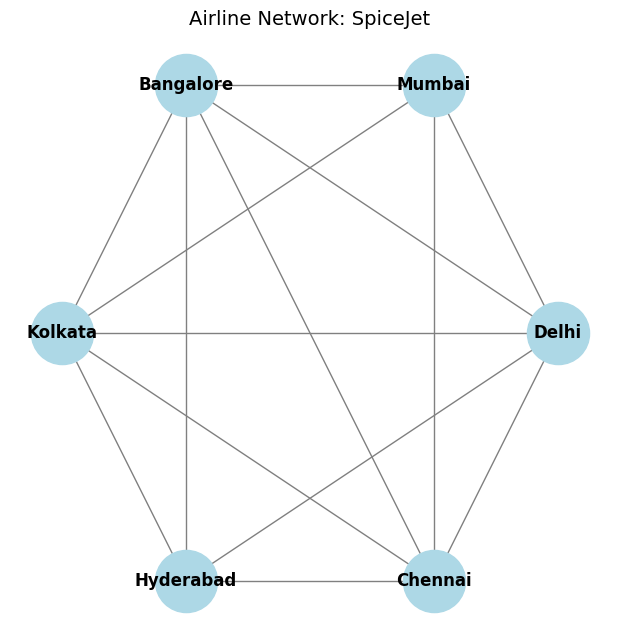

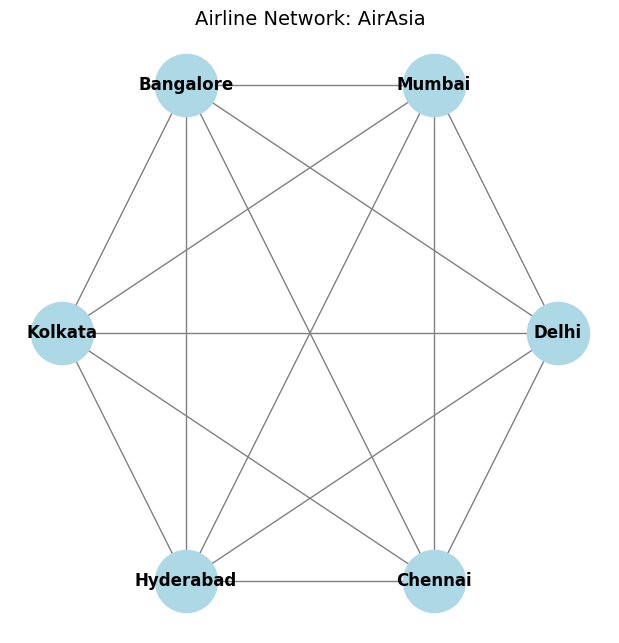

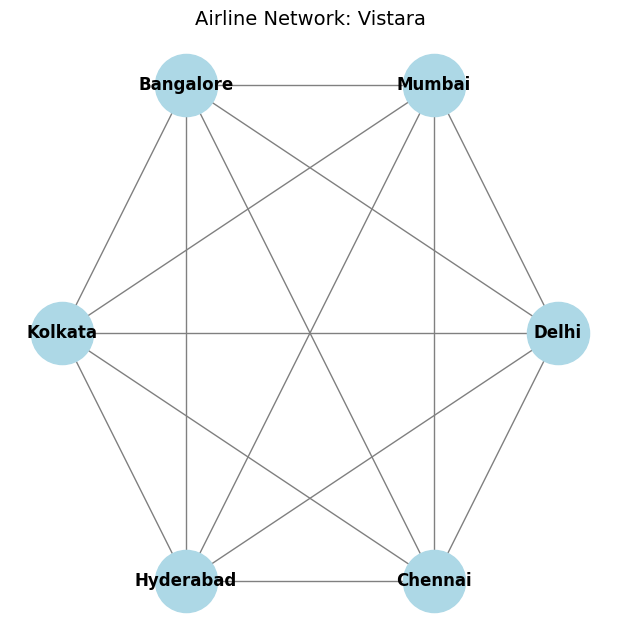

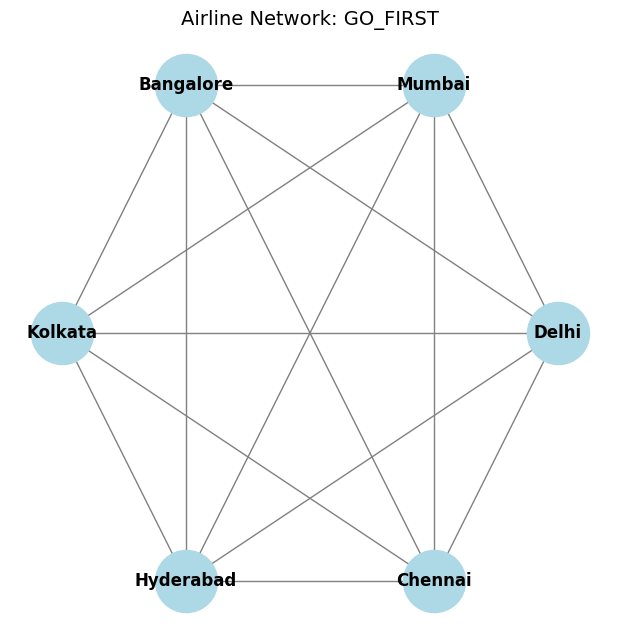

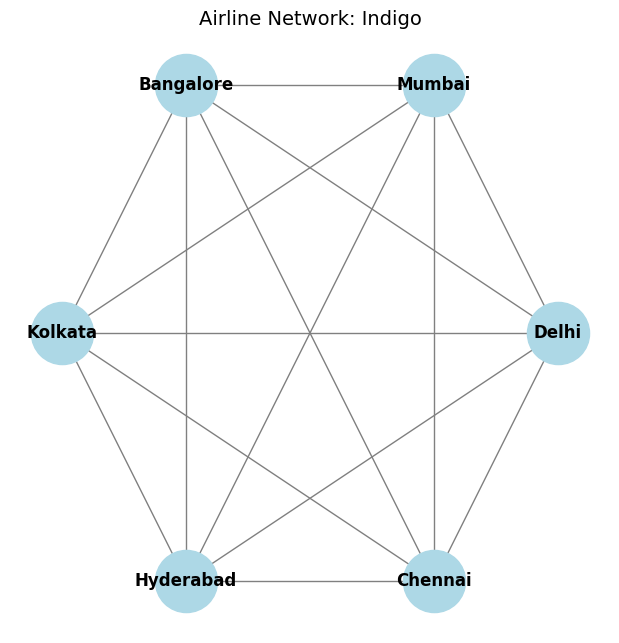

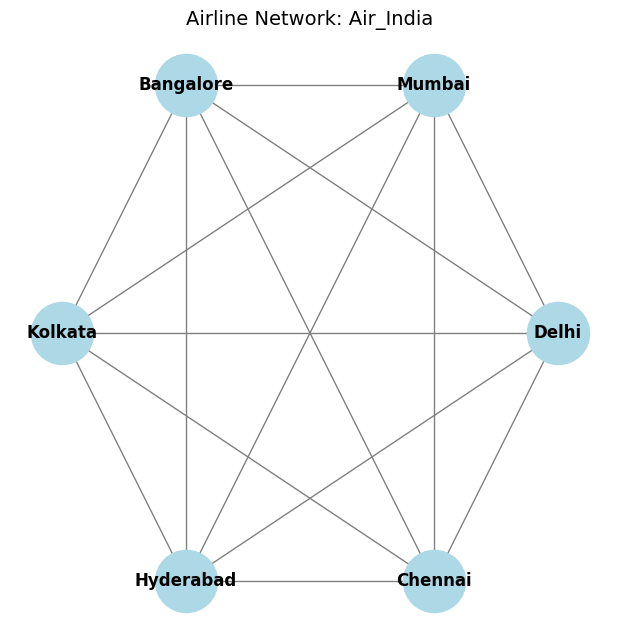

In [69]:
# 항공사별 네트워크 시각화
for airline in df['airline'].unique():
    subset = df[df["airline"] == airline]

    G = nx.Graph()

    # 엣지 추가 (출발도시 → 도착도시)
    for _, row in subset.iterrows():
        G.add_edge(row["source_city"], row["destination_city"])

    pos = nx.circular_layout(G)
    # 그래프 시각화
    plt.figure(figsize=(6,6))
    nx.draw(
        G, pos,
        with_labels=True,
        node_size=2000,
        node_color="lightblue",
        font_size=12,
        font_weight="bold",
        edge_color="gray"
    )
    plt.title(f"Airline Network: {airline}", fontsize=14)
    plt.show()

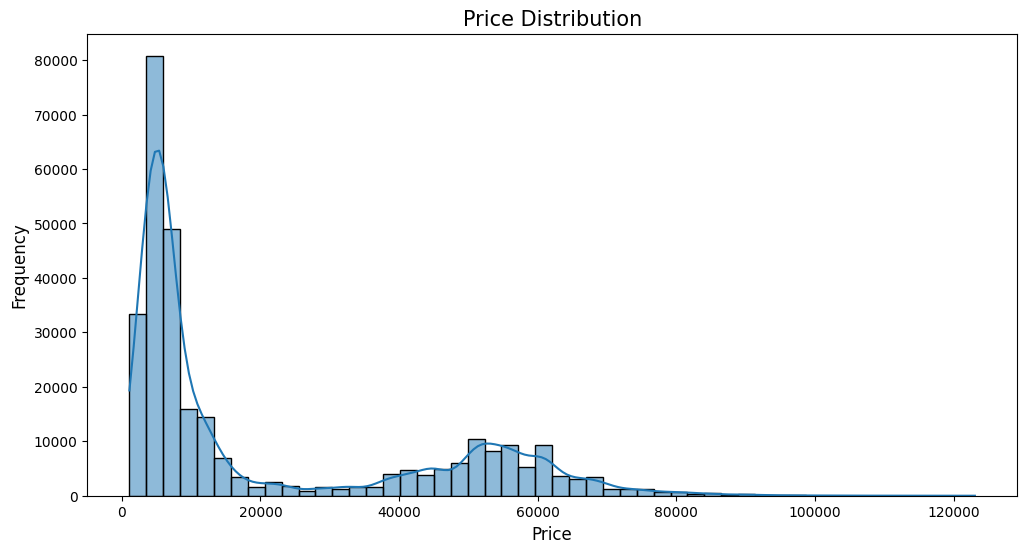

In [70]:
#가격(price)분포 히스토그램으로 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='price', bins=50, kde=True)
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

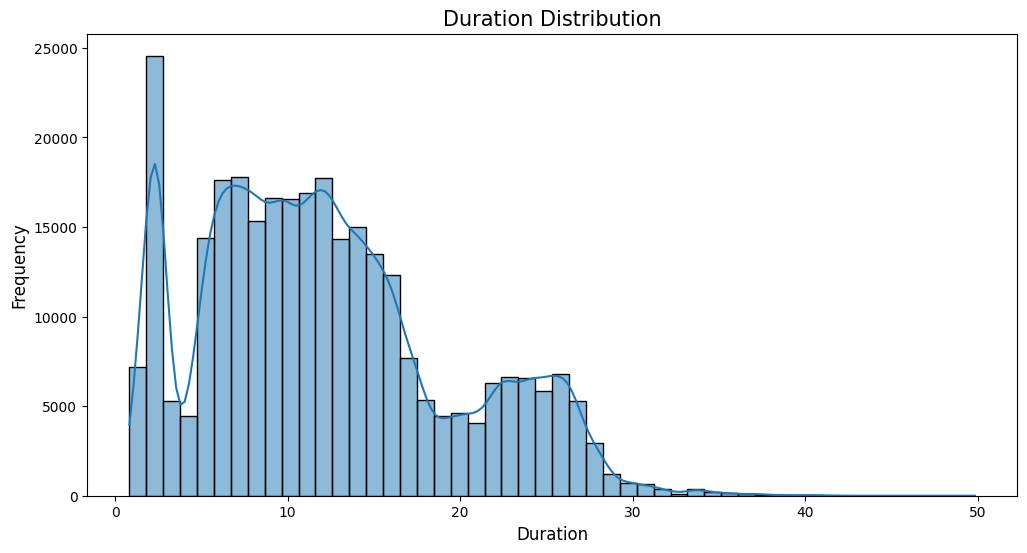

In [71]:
#시간(duration)분포 히스토그램으로 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='duration', bins=50, kde=True)
plt.title('Duration Distribution', fontsize=15)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [72]:
# duration 상위 1% 이상치 제거
threshold = df_cleaned["duration"].quantile(0.99)
df_cleaned = df_cleaned[df_cleaned["duration"] <= threshold]

In [73]:
# 로그변환해 파생변수 'price_log', 'duration_log' 컬럼 추가
df_cleaned['price_log']=np.log(df_cleaned['price'])
df_cleaned['duration_log']=np.log(df_cleaned['duration'])

print(df_cleaned.head())

    airline source_city departure_time  stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening      0          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning      0        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning      0  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning      0      Afternoon           Mumbai   
4   Vistara       Delhi        Morning      0        Morning           Mumbai   

     class  duration  days_left  price         route  price_log  duration_log  
0  Economy      2.17          1   5953  Delhi-Mumbai   8.691651      0.774727  
1  Economy      2.33          1   5953  Delhi-Mumbai   8.691651      0.845868  
2  Economy      2.17          1   5956  Delhi-Mumbai   8.692154      0.774727  
3  Economy      2.25          1   5955  Delhi-Mumbai   8.691986      0.810930  
4  Economy      2.33          1   5955  Delhi-Mumbai   8.691986      0.845868  


Text(0, 0.5, 'Frequency')

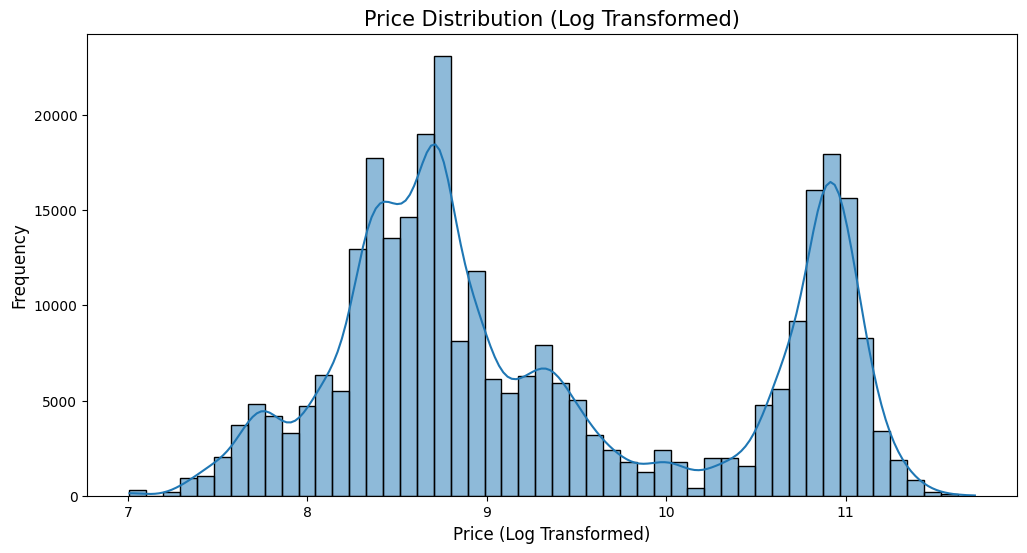

In [74]:
#로그변환 히스토그램으로 시각화 (가격)
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='price_log', bins=50, kde=True)
plt.title('Price Distribution (Log Transformed)', fontsize=15)
plt.xlabel('Price (Log Transformed)', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

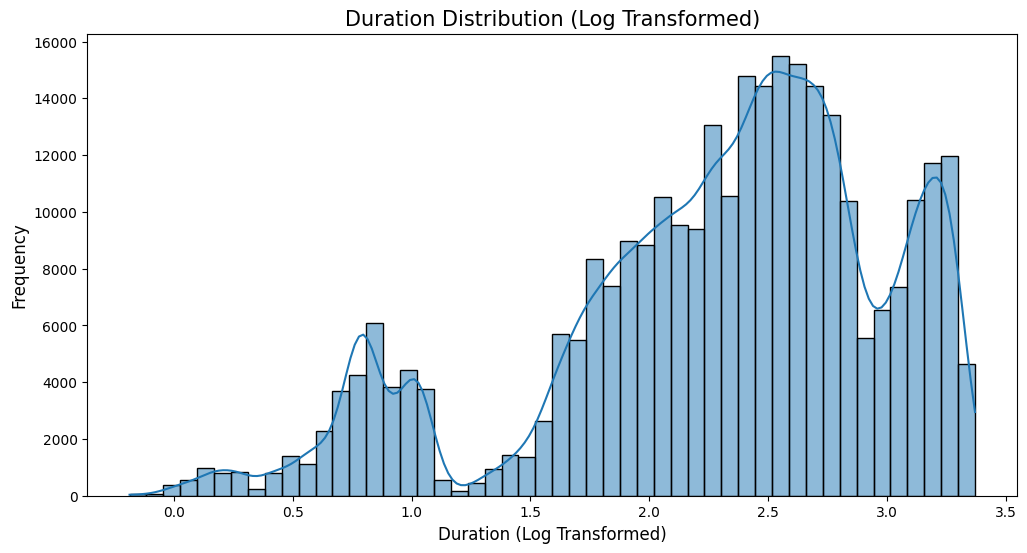

In [75]:
#로그변환 히스토그램으로 시각화 (시간)
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='duration_log', bins=50, kde=True)
plt.title('Duration Distribution (Log Transformed)', fontsize=15)
plt.xlabel('Duration (Log Transformed)', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

In [76]:
# 원-핫 인코딩
# route 컬럼은 source_city와 destination_city의 정보가 합쳐져 있으므로 제외하고 각각을 인코딩
categorical_features = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'class']

# drop_first=True는 범주 간의 다중공선성 문제를 방지하기 위해 각 변수의 첫 번째 카테고리를 제거하는 옵션
# 선형 모델과 비선형 모델에서 각각 인코딩 (drop_first 옵션 차이)
df_encoded_linear = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True) # 선형
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=False) # 비선형

# 인코딩 후 데이터 샘플 확인
print("--- [인코딩 후 데이터 샘플 확인] ---")
print("===== df_encoded_linear =====")
print(df_encoded_linear.head())
print("\n")
print("===== df_encoded =====")
print(df_encoded.head())

--- [인코딩 후 데이터 샘플 확인] ---
===== df_encoded_linear =====
   stops  duration  days_left  price         route  price_log  duration_log  \
0      0      2.17          1   5953  Delhi-Mumbai   8.691651      0.774727   
1      0      2.33          1   5953  Delhi-Mumbai   8.691651      0.845868   
2      0      2.17          1   5956  Delhi-Mumbai   8.692154      0.774727   
3      0      2.25          1   5955  Delhi-Mumbai   8.691986      0.810930   
4      0      2.33          1   5955  Delhi-Mumbai   8.691986      0.845868   

   airline_Air_India  airline_GO_FIRST  airline_Indigo  ...  \
0              False             False           False  ...   
1              False             False           False  ...   
2              False             False           False  ...   
3              False             False           False  ...   
4              False             False           False  ...   

   departure_time_Evening  departure_time_Late_Night  departure_time_Morning  \
0         

In [77]:
# 인코딩 후 데이터 정보 확인
print("\n--- [인코딩 후 데이터 정보 확인] ---")
df_encoded_linear.info()
df_encoded.info()


--- [인코딩 후 데이터 정보 확인] ---
<class 'pandas.core.frame.DataFrame'>
Index: 297177 entries, 0 to 300152
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         297177 non-null  int64  
 1   duration                      297177 non-null  float64
 2   days_left                     297177 non-null  int64  
 3   price                         297177 non-null  int64  
 4   route                         297177 non-null  object 
 5   price_log                     297177 non-null  float64
 6   duration_log                  297177 non-null  float64
 7   airline_Air_India             297177 non-null  bool   
 8   airline_GO_FIRST              297177 non-null  bool   
 9   airline_Indigo                297177 non-null  bool   
 10  airline_SpiceJet              297177 non-null  bool   
 11  airline_Vistara               297177 non-null  bool   
 12  source_city_Chennai   

---<데이터 시각화>---


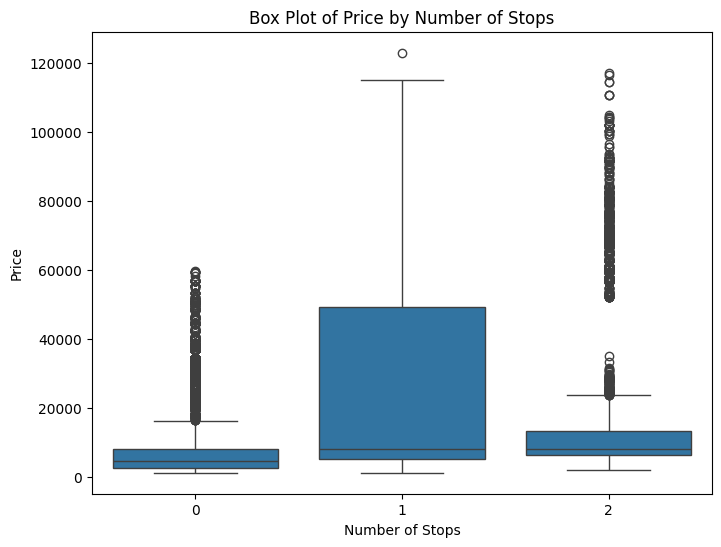

In [78]:
print("---<데이터 시각화>---")

#경유 횟수('stops')에 따른 가격('price')의 분포를 박스 플롯으로 시각화
sns.set_style

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='stops', y='price')
plt.title('Box Plot of Price by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()

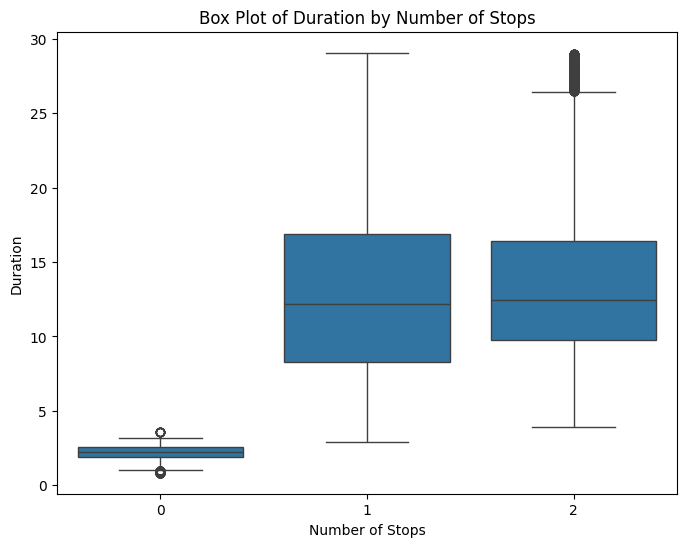

In [79]:
#경유 횟수('stops')에 따른 시간('duration')의 분포를 박스 플롯으로 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='stops', y='duration')
plt.title('Box Plot of Duration by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Duration')
plt.show()

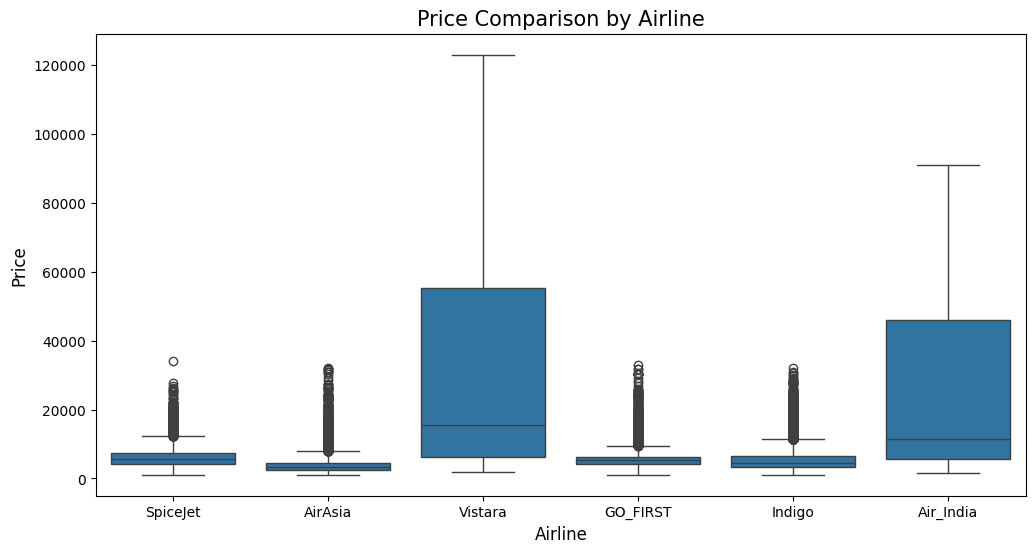

In [80]:
#항공사별 가격 비교 ('airline')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='airline', y='price')
plt.title('Price Comparison by Airline', fontsize=15)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

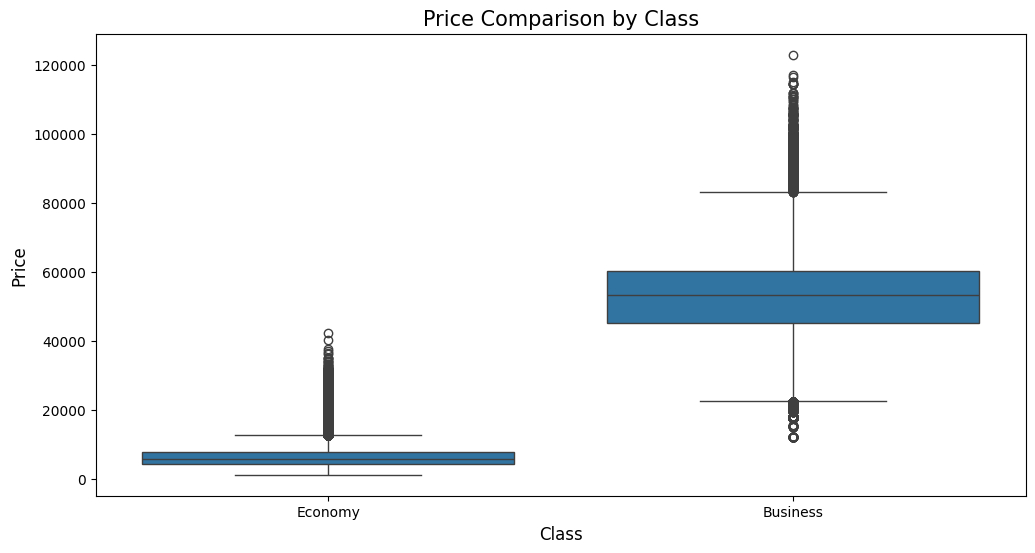

In [81]:
#좌석 등급별 가격 비교 ('class')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='class', y='price')
plt.title('Price Comparison by Class', fontsize=15)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

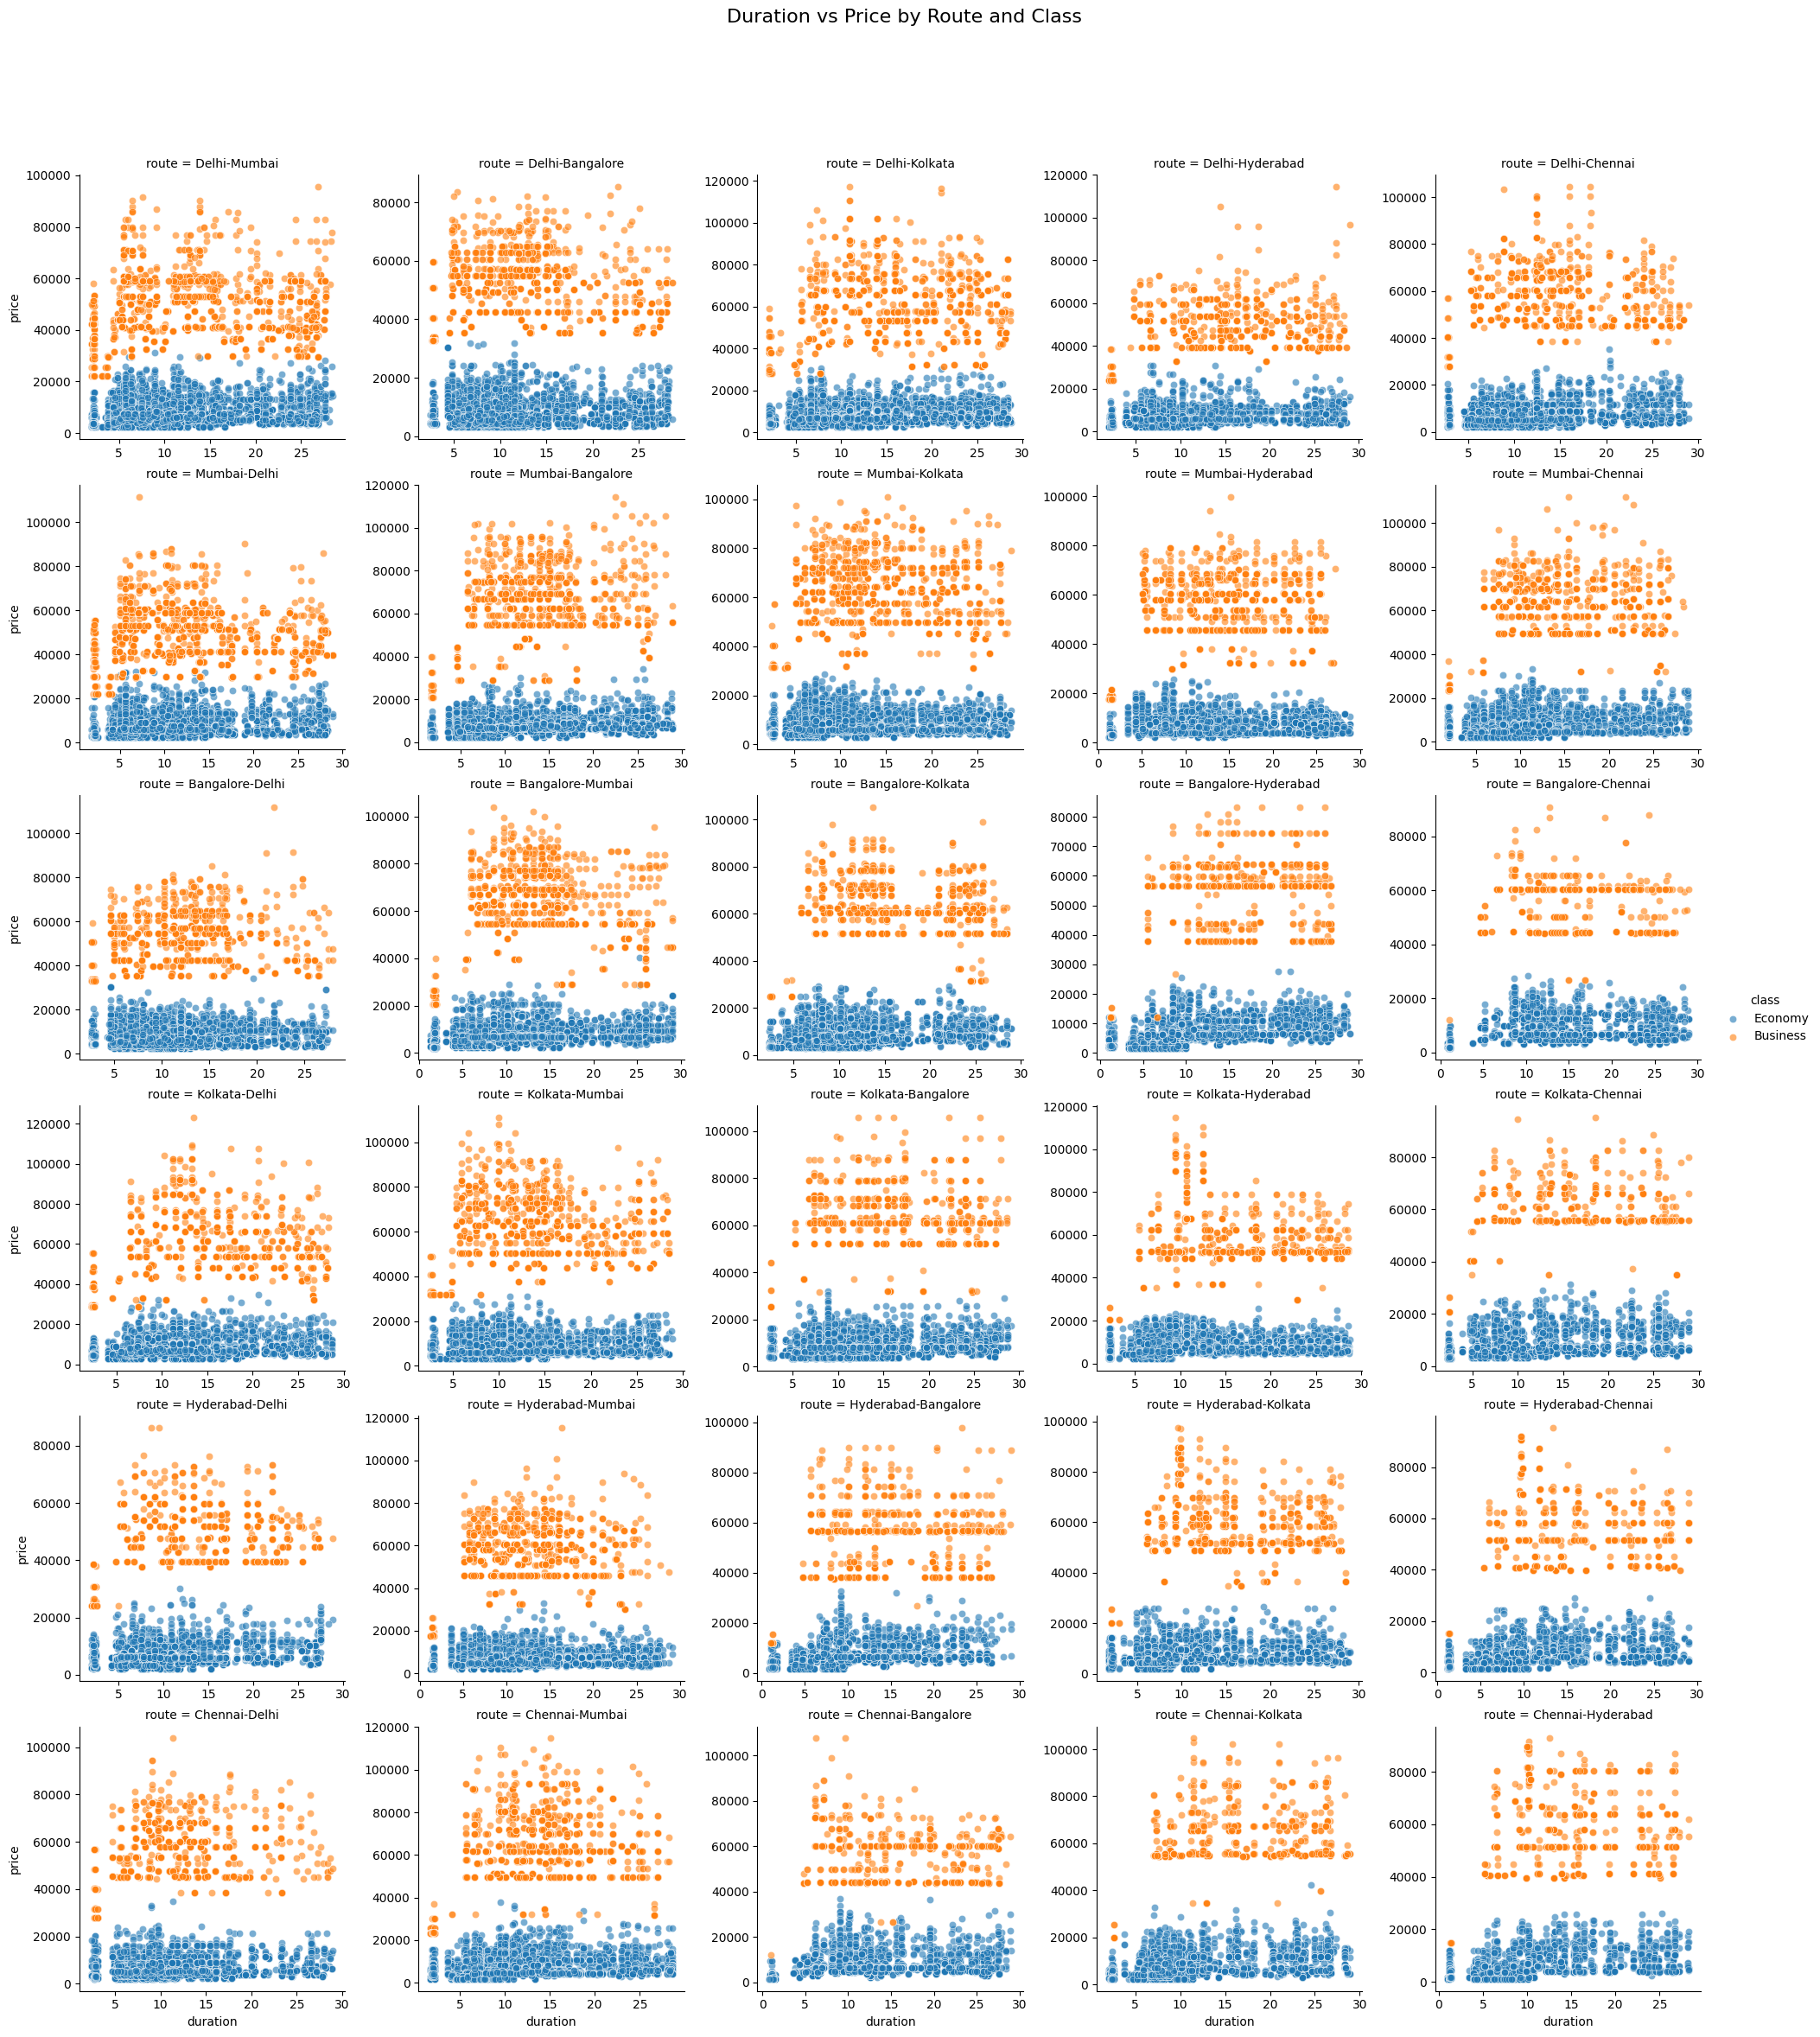

In [82]:
#비행시간(duration)과 가격(price)의 관계
#좌석 등급(class)에 따라 점의 색상 구분 (hue='class')

# FacetGrid로 route 별로 subplot 생성
g = sns.FacetGrid(df_cleaned, col="route", hue="class", col_wrap=5, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot, "duration", "price", alpha=0.6)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Duration vs Price by Route and Class", fontsize=16)

plt.show()

=== Pearson 상관 ===


,price,price_log,duration,duration_log,days_left,stops
price,1.000,0.947,0.217,0.254,-0.092,0.124
price_log,0.947,1.000,0.272,0.316,-0.193,0.172
duration,0.217,0.272,1.000,0.923,-0.032,0.464
duration_log,0.254,0.316,0.923,1.000,-0.022,0.679
days_left,-0.092,-0.193,-0.032,-0.022,1.000,-0.004
stops,0.124,0.172,0.464,0.679,-0.004,1.000




=== Spearman 상관 ===


,price,price_log,duration,duration_log,days_left,stops
price,1.000,1.000,0.319,0.319,-0.266,0.224
price_log,1.000,1.000,0.319,0.319,-0.266,0.224
duration,0.319,0.319,1.000,1.000,-0.029,0.510
duration_log,0.319,0.319,1.000,1.000,-0.029,0.510
days_left,-0.266,-0.266,-0.029,-0.029,1.000,-0.004
stops,0.224,0.224,0.510,0.510,-0.004,1.000


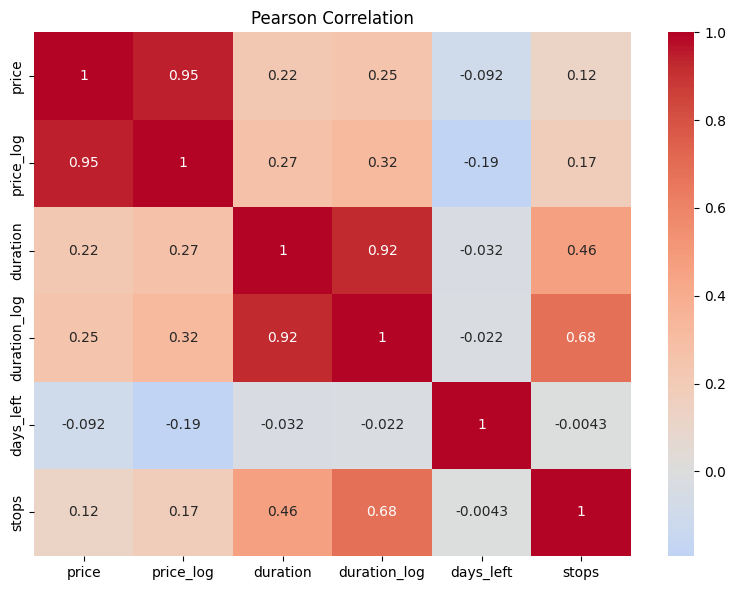

In [83]:
#상관/연관 분석
# 1) 수치 수치 상관 (피어슨/스피어만)
num_cols = ["price", "price_log", "duration", "duration_log", "days_left", "stops"]

pearson_corr  = df_cleaned[num_cols].corr(method="pearson")
spearman_corr = df_cleaned[num_cols].corr(method="spearman")

print("=== Pearson 상관 ===");  display(pearson_corr.round(3))
print("\n")
print("=== Spearman 상관 ==="); display(spearman_corr.round(3))
print("\n")

plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation")
plt.tight_layout()
plt.show()

stops와 duration이 상관관계가 높음

In [84]:
# 2) route 디메안 상관 (노선별 평균으로 노선 효과 제거 후 price↔duration)
p_dm = df_cleaned["price"]    - df_cleaned.groupby("route")["price"].transform("mean")
t_dm = df_cleaned["duration"] - df_cleaned.groupby("route")["duration"].transform("mean")
r_dm = np.corrcoef(p_dm, t_dm)[0,1]
print(f"노선 효과 제거 후 price↔duration 상관(피어슨): {r_dm:.3f}")

노선 효과 제거 후 price↔duration 상관(피어슨): 0.211


시간과 가격은 큰 상관관계가 없다.

In [85]:
# 3) 범주↔수치 (ANOVA + Kruskal–Wallis)

#anova
def anova_effect_size(df, num_col, cat_col):
    groups = [g[num_col].dropna().values for _, g in df.groupby(cat_col) if len(g)]
    if len(groups) < 2: return np.nan, np.nan, np.nan

    f, p = stats.f_oneway(*groups) # 일원배치분산분석
    grand = df[num_col].mean() # 전체 평균
    ssb = sum(len(g)*(np.mean(g)-grand)**2 for g in groups) # 그룹별 제곱합
    sst = sum(((g - grand)**2).sum() for g in groups) # 전체 제곱합
    eta2 = ssb/sst if sst>0 else np.nan # 설명력
    return f, p, eta2

#kruskal
def kruskal_test(df, num_col, cat_col):
    groups = [g[num_col].dropna().values for _, g in df.groupby(cat_col) if len(g)]
    if len(groups) < 2: return np.nan, np.nan

    h, p = stats.kruskal(*groups)
    return h, p


for cat_col in ["airline","class","departure_time","arrival_time"]:
    for num_col in ["price","duration"]:
        f, p, eta2 = anova_effect_size(df_cleaned, num_col, cat_col)
        print(f"[ANOVA] {num_col} ~ {cat_col}: F={f:.2f}, p={p:.3e}, eta={eta2:.3f}")

        h, p_kw = kruskal_test(df_cleaned, num_col, cat_col)
        print(f"[Kruskal–Wallis] H={h:.2f}, p={p_kw:.3e}")


[ANOVA] price ~ airline: F=17233.26, p=0.000e+00, eta=0.225
[Kruskal–Wallis] H=93762.44, p=0.000e+00
[ANOVA] duration ~ airline: F=15622.33, p=0.000e+00, eta=0.208
[Kruskal–Wallis] H=69065.64, p=0.000e+00
[ANOVA] price ~ class: F=2175189.39, p=0.000e+00, eta=0.880
[Kruskal–Wallis] H=191483.38, p=0.000e+00
[ANOVA] duration ~ class: F=7362.14, p=0.000e+00, eta=0.024
[Kruskal–Wallis] H=8864.85, p=0.000e+00
[ANOVA] price ~ departure_time: F=326.88, p=0.000e+00, eta=0.005
[Kruskal–Wallis] H=1938.02, p=0.000e+00
[ANOVA] duration ~ departure_time: F=2766.17, p=0.000e+00, eta=0.044
[Kruskal–Wallis] H=14876.98, p=0.000e+00
[ANOVA] price ~ arrival_time: F=1021.47, p=0.000e+00, eta=0.017
[Kruskal–Wallis] H=8905.46, p=0.000e+00
[ANOVA] duration ~ arrival_time: F=1977.89, p=0.000e+00, eta=0.032
[Kruskal–Wallis] H=11586.51, p=0.000e+00


p가 0인건 부동소수점 정밀도 때문인것 같음

항공사에 따라 가격 시간 차이 있음

출발/도착 시간대에 따른 가격/시간 차이는 거의 없음

클래스별 가격 차이 매우 큼

In [86]:
# 4) 범주↔범주 (Cramér’s V)
def cramers_v(ct):
    chi2 = stats.chi2_contingency(ct)[0]
    n = ct.values.sum()
    phi2 = chi2/n
    r,k = ct.shape
    # bias-corrected Cramér’s V
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    denom = min((kcorr-1),(rcorr-1))
    return np.sqrt(phi2corr/denom) if denom>0 else np.nan

pairs = [
    ("airline", "class"),
    ("airline", "departure_time"),
    ("airline", "stops")
]

for c1, c2 in pairs:
    ct = pd.crosstab(df_cleaned[c1], df_cleaned[c2])
    v = cramers_v(ct)
    print(f"Cramér’s V ({c1} vs {c2}) = {v:.3f}")
    display(ct)
    print("\n")

Cramér’s V (airline vs class) = 0.453


class,Business,Economy
airline,,
AirAsia,0,16098
Air_India,32607,46200
GO_FIRST,0,23173
Indigo,0,43120
SpiceJet,0,9011
Vistara,60422,66546




Cramér’s V (airline vs departure_time) = 0.082


departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
airline,,,,,,
AirAsia,3078,3692,3657,143,2348,3180
Air_India,10386,19101,18482,291,17085,13462
GO_FIRST,4942,6103,4904,146,4116,2962
Indigo,10155,8184,8460,726,11491,4104
SpiceJet,1193,2728,2031,0,1519,1540
Vistara,17118,26122,27379,0,33584,22765




Cramér’s V (airline vs stops) = 0.175


stops,0,1,2
airline,,,
AirAsia,2434,11418,2246
Air_India,6409,69445,2953
GO_FIRST,3223,19545,405
Indigo,11216,31166,738
SpiceJet,2462,6549,0
Vistara,10260,110716,5992


business 클래스 운영하는 항공사는 2곳 -> 항공사마다 클래스 운영 전략 차이 존재 (0.449)

항공사별 시간대 차이는 매우 적음 (0.081)

SpiceJet 2회 경유 없음
Vistara 1회 경유 매우 많음
전체적으로 1회 경유가 많음 -> 항공사별 경유 차이는 약함 (0.174)

In [87]:
# Business 클래스를 운영하는 항공사 목록 확인
business_airlines = df_cleaned.loc[df_cleaned["class"] == "Business", "airline"].unique()

print("Business 클래스가 있는 항공사 목록:")
print(business_airlines)

Business 클래스가 있는 항공사 목록:
['Air_India' 'Vistara']


In [88]:
# ===== 추가 피처엔지니어링 =====

# (1) 레드아이/저녁 도착 플래그
df_cleaned["is_redeye_from_dep"] = df_cleaned["departure_time"].isin(["Night","Early_Morning"]).astype(int)
df_cleaned["is_evening_arrival"] = df_cleaned["arrival_time"].isin(["Evening","Night"]).astype(int)

# (2) 노선별 항공사 경쟁강도(HHI)
_cnt = (df_cleaned.groupby(["route","airline"]).size().rename("n").reset_index()) # 운항수
_cnt["share"] = _cnt["n"] / _cnt.groupby("route")["n"].transform("sum") # 노선별 점유율
route_hhi = _cnt.groupby("route")["share"].apply(lambda s: (s**2).sum()).rename("route_hhi").reset_index()
df_cleaned = df_cleaned.merge(route_hhi, on="route", how="left")

In [89]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   airline             297177 non-null  object 
 1   source_city         297177 non-null  object 
 2   departure_time      297177 non-null  object 
 3   stops               297177 non-null  int64  
 4   arrival_time        297177 non-null  object 
 5   destination_city    297177 non-null  object 
 6   class               297177 non-null  object 
 7   duration            297177 non-null  float64
 8   days_left           297177 non-null  int64  
 9   price               297177 non-null  int64  
 10  route               297177 non-null  object 
 11  price_log           297177 non-null  float64
 12  duration_log        297177 non-null  float64
 13  is_redeye_from_dep  297177 non-null  int64  
 14  is_evening_arrival  297177 non-null  int64  
 15  route_hhi           297177 non-nul

In [90]:
# ===== df_encoded에 파생 수치 피처 붙이기 =====
df_encoded = df_encoded.reset_index(drop=True)
df_encoded_linear = df_encoded_linear.reset_index(drop=True)
df_cleaned = df_cleaned.reset_index(drop=True)

to_add = ["is_redeye_from_dep","is_evening_arrival","route_hhi"]
df_encoded_linear[to_add] = df_cleaned[to_add]
df_encoded[to_add] = df_cleaned[to_add]

In [91]:
df_encoded.info()
print("\n")
df_encoded_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         297177 non-null  int64  
 1   duration                      297177 non-null  float64
 2   days_left                     297177 non-null  int64  
 3   price                         297177 non-null  int64  
 4   route                         297177 non-null  object 
 5   price_log                     297177 non-null  float64
 6   duration_log                  297177 non-null  float64
 7   airline_AirAsia               297177 non-null  bool   
 8   airline_Air_India             297177 non-null  bool   
 9   airline_GO_FIRST              297177 non-null  bool   
 10  airline_Indigo                297177 non-null  bool   
 11  airline_SpiceJet              297177 non-null  bool   
 12  airline_Vistara               297177 non-nul

# 모델 설계 및 데이터셋 예측

In [92]:
df_encoded.drop(columns=["price", "duration", "route"], inplace=True)
df_encoded_linear.drop(columns=["price", "duration", "route"], inplace=True)

# ===== X / y 구성 =====
targets = ["price_log","duration_log"]
X = df_encoded.drop(columns=targets, errors="ignore").copy()
X_linear = df_encoded_linear.drop(columns=targets, errors="ignore").copy()
y = df_encoded[targets].copy()

print(" Feature design (with one-hot ready) complete")
print(" - X shape:", X.shape)
print(" - X_linear shape:", X_linear.shape)
print(" - y shape:", y.shape)
print(" - targets:", targets)


 Feature design (with one-hot ready) complete
 - X shape: (297177, 37)
 - X_linear shape: (297177, 31)
 - y shape: (297177, 2)
 - targets: ['price_log', 'duration_log']


In [93]:
# =========================
# 데이터 분할 (누수 방지: route 그룹 분할)
# =========================

SEED = 42
TEST_SIZE = 0.2

# 1) 그룹 정보(route) 준비
groups = df_cleaned.loc[X.index, "route"]

# 2) 분할
# GroupShuffleSplit으로 무작위가 아니라 route 단위로 분할해 누수 방지
gss = GroupShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=SEED)
tr_idx, te_idx = next(gss.split(X, y, groups=groups))
X_train, X_test = X.iloc[tr_idx], X.iloc[te_idx]
X_linear_train, X_linear_test = X_linear.iloc[tr_idx], X_linear.iloc[te_idx]
y_train, y_test = y.iloc[tr_idx], y.iloc[te_idx]
g_train, g_test = groups.iloc[tr_idx], groups.iloc[te_idx]
# 누수 체크: train/test 간 route 겹침 없어야 함
overlap = set(g_train.unique()) & set(g_test.unique())
print(f"Route overlap: {len(overlap)}")
assert len(overlap) == 0, f"경고: train/test에 동일 route가 있습니다: {list(overlap)[:5]}"


print(" - X_train / X_test:", X_train.shape, X_test.shape)
print(" - X_linear_train / X_linear_test:", X_linear_train.shape, X_linear_test.shape)
print(" - y_train / y_test:", y_train.shape, y_test.shape)

Route overlap: 0
 - X_train / X_test: (242201, 37) (54976, 37)
 - X_linear_train / X_linear_test: (242201, 31) (54976, 31)
 - y_train / y_test: (242201, 2) (54976, 2)


In [94]:
# 숫자형 X1, y1 준비
num_features = [col for col in df_encoded.columns
                if col not in targets and df_encoded[col].dtype in [np.int64, np.float64, bool]]
num_features_linear = [col for col in df_encoded_linear.columns
                       if col not in targets and df_encoded_linear[col].dtype in [np.int64, np.float64, bool]]


X1 = df_encoded[num_features]
X1_linear = df_encoded_linear[num_features_linear]
y1 = df_encoded[targets]

# 앞에서 얻은 train/test 인덱스 재사용
X1_train, X1_test = X1.iloc[tr_idx], X1.iloc[te_idx]
X1_linear_train, X1_linear_test = X1_linear.iloc[tr_idx], X1_linear.iloc[te_idx]
y1_train, y1_test = y1.iloc[tr_idx], y1.iloc[te_idx]

print(" 기존 분할 재사용 완료")
print(" - X1_train:", X1_train.shape, "X1_test:", X1_test.shape)
print(" - X1_linear_train:", X1_linear_train.shape, "X1_linear_test:", X1_linear_test.shape)
print(" - y1_train:", y1_train.shape, "y1_test:", y1_test.shape)

 기존 분할 재사용 완료
 - X1_train: (242201, 37) X1_test: (54976, 37)
 - X1_linear_train: (242201, 31) X1_linear_test: (54976, 31)
 - y1_train: (242201, 2) y1_test: (54976, 2)


In [95]:
# 스케일링
scaler = StandardScaler()
X1_linear_train = scaler.fit_transform(X1_linear_train)
X1_linear_test  = scaler.transform(X1_linear_test)

alphas = np.logspace(-2, 2, 20)

# 학습 함수 정의
def train_ridge_lasso(X, y, alphas, model_type):
    Model = Ridge if model_type == "ridge" else Lasso
    model = Model(random_state=42, max_iter=5000)
    grid = GridSearchCV(model, {"alpha": alphas}, cv=5, scoring="r2")
    grid.fit(X, y)
    best_model = grid.best_estimator_
    best_alpha = grid.best_params_["alpha"]
    return best_model, best_alpha


y_price = y1_train["price_log"]
y_dur   = y1_train["duration_log"]

# Ridge
ridge_price, alpha_ridge_price = train_ridge_lasso(X1_linear_train, y_price, alphas, model_type="ridge")
ridge_dur,   alpha_ridge_dur   = train_ridge_lasso(X1_linear_train, y_dur,   alphas, model_type="ridge")

# Lasso
lasso_price, alpha_lasso_price = train_ridge_lasso(X1_linear_train, y_price, alphas, model_type="lasso")
lasso_dur,   alpha_lasso_dur   = train_ridge_lasso(X1_linear_train, y_dur,   alphas, model_type="lasso")

# ======================
# 성능 평가
# ======================
def print_model_scores(model, X_train, X_test, y_train, y_test):
    print(f"R² train: {model.score(X_train, y_train):.3f} | R² test: {model.score(X_test, y_test):.3f}")

print("=== Ridge/Lasso (log(price)) ===")
print(f" Ridge best alpha: {alpha_ridge_price}")
print_model_scores(ridge_price, X1_linear_train, X1_linear_test, y1_train["price_log"], y1_test["price_log"])

print(f" Lasso best alpha: {alpha_lasso_price}")
print_model_scores(lasso_price, X1_linear_train, X1_linear_test, y1_train["price_log"], y1_test["price_log"])


print("=== Ridge/Lasso (log(duration)) ===")
print(f" Ridge best alpha: {alpha_ridge_dur}")
print_model_scores(ridge_dur, X1_linear_train, X1_linear_test, y1_train["duration_log"], y1_test["duration_log"])

print(f" Lasso best alpha: {alpha_lasso_dur}")
print_model_scores(lasso_dur, X1_linear_train, X1_linear_test, y1_train["duration_log"], y1_test["duration_log"])

=== Ridge/Lasso (log(price)) ===
 Ridge best alpha: 0.01
R² train: 0.915 | R² test: 0.909
 Lasso best alpha: 0.01
R² train: 0.910 | R² test: 0.904
=== Ridge/Lasso (log(duration)) ===
 Ridge best alpha: 100.0
R² train: 0.594 | R² test: 0.653
 Lasso best alpha: 0.01
R² train: 0.588 | R² test: 0.644



Top 변수 (log(price)):
class_Economy                -0.946832
days_left                    -0.184345
airline_Vistara               0.172888
stops                         0.142650
airline_Air_India             0.100089
source_city_Kolkata           0.048918
destination_city_Kolkata      0.036540
airline_SpiceJet              0.025681
airline_GO_FIRST              0.024673
destination_city_Hyderabad   -0.019531
dtype: float64

Top 변수 (log(duration)):
stops                     0.443272
airline_Air_India         0.160163
airline_Vistara           0.109821
airline_Indigo           -0.093127
departure_time_Night      0.076342
departure_time_Evening    0.066423
airline_SpiceJet          0.046044
arrival_time_Morning      0.036521
source_city_Kolkata       0.022051
class_Economy            -0.019731
dtype: float64




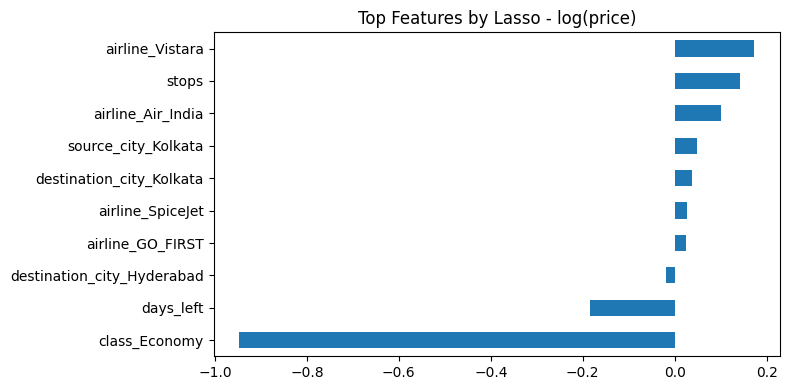

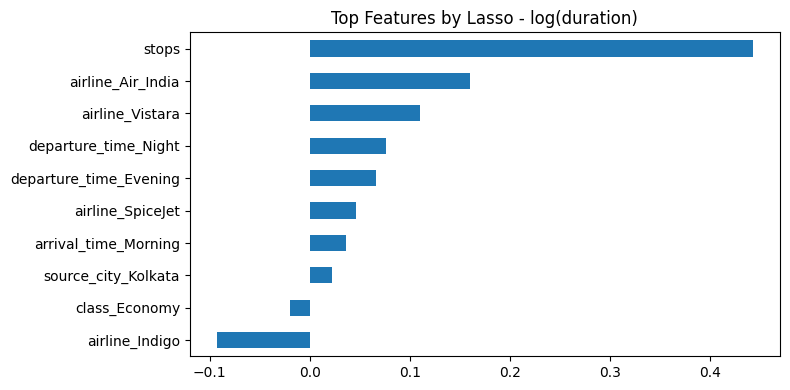

In [96]:
# ======================
# 변수 중요도 (Lasso)
# ======================
coef_price = pd.Series(lasso_price.coef_, index=X1_linear.columns).sort_values(key=np.abs, ascending=False)
coef_dur   = pd.Series(lasso_dur.coef_,   index=X1_linear.columns).sort_values(key=np.abs, ascending=False)

print("\nTop 변수 (log(price)):")
print(coef_price.head(10))
print("\nTop 변수 (log(duration)):")
print(coef_dur.head(10))

# ======================
# 변수 중요도 시각화
# ======================
def plot_top_features(coef_series, title):
    plt.figure(figsize=(8, 4))
    coef_series.head(10).sort_values().plot(kind='barh')
    plt.title(title)
    plt.tight_layout()
    plt.show()

print("\n")
plot_top_features(coef_price, "Top Features by Lasso - log(price)")
print("\n")
plot_top_features(coef_dur, "Top Features by Lasso - log(duration)")

price - 클래스, 경유, 항공사 ...

duration - 클래스, 항공사, 경유, 출발/도착 시간대 ...

In [97]:
# 랜덤포레스트
rf_price = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_dur = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 학습
rf_price.fit(X1_train, y1_train["price_log"])
rf_dur.fit(X1_train, y1_train["duration_log"])

# 예측
y_train_pred_price = rf_price.predict(X1_train)
y_test_pred_price = rf_price.predict(X1_test)
y_train_pred_dur = rf_dur.predict(X1_train)
y_test_pred_dur = rf_dur.predict(X1_test)

# 성능 평가
def evaluate_model(y_train, y_test, y_train_pred, y_test_pred, label):
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)

    print(f"=== {label} ===")
    print(f"R² train: {r2_score(y_train, y_train_pred):.3f}")
    print(f"R² test:  {r2_score(y_test,  y_test_pred):.3f}")
    print(f"RMSE test: {rmse:.3f}")
    print(f"exp(RMSE): {np.exp(rmse):.3f}")
    print()

evaluate_model(
    y1_train["price_log"], y1_test["price_log"],
    y_train_pred_price, y_test_pred_price,
    "Random Forest (log(price))"
)

evaluate_model(
    y1_train["duration_log"], y1_test["duration_log"],
    y_train_pred_dur, y_test_pred_dur,
    "Random Forest (log(duration))"
)

=== Random Forest (log(price)) ===
R² train: 0.987
R² test:  0.947
RMSE test: 0.258
exp(RMSE): 1.295

=== Random Forest (log(duration)) ===
R² train: 0.962
R² test:  0.879
RMSE test: 0.268
exp(RMSE): 1.308



Top Features (log(price)) - Random Forest:
class_Business         0.596642
class_Economy          0.243655
days_left              0.069654
stops                  0.029686
route_hhi              0.014293
airline_AirAsia        0.009147
airline_Indigo         0.005567
airline_Air_India      0.004928
airline_Vistara        0.003283
source_city_Kolkata    0.002702
dtype: float64

Top Features (log(duration()) - Random Forest:
stops                     0.603997
airline_Indigo            0.075626
departure_time_Night      0.030293
route_hhi                 0.030066
arrival_time_Afternoon    0.028759
departure_time_Evening    0.028001
arrival_time_Evening      0.025128
days_left                 0.020879
is_evening_arrival        0.018584
arrival_time_Morning      0.015974
dtype: float64




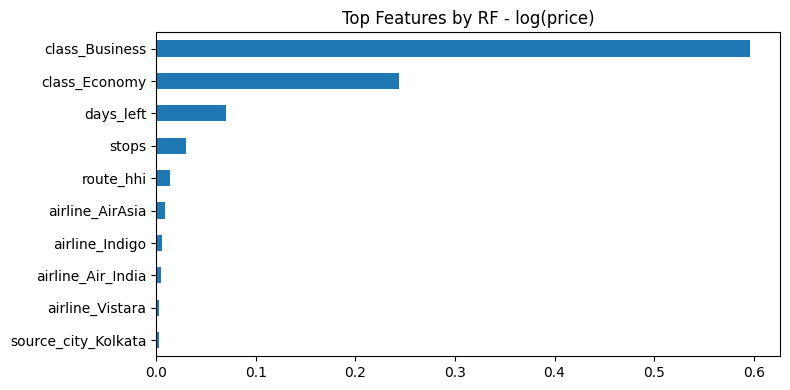

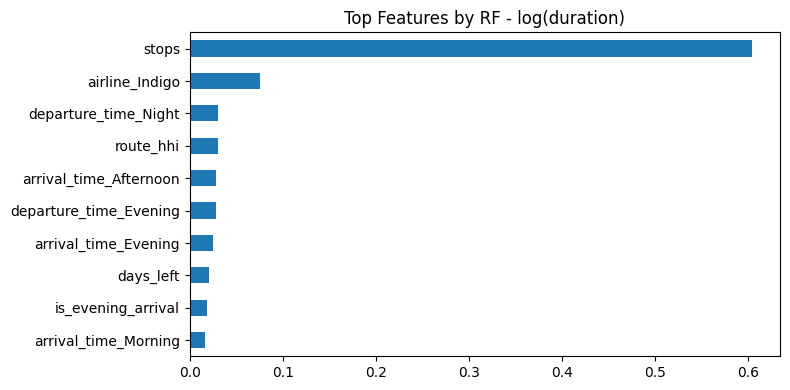

In [98]:
# ======================
# 변수 중요도 (Random Forest)
# ======================
importances_price = pd.Series(rf_price.feature_importances_, index=X1.columns).sort_values(ascending=False)
importances_dur   = pd.Series(rf_dur.feature_importances_,   index=X1.columns).sort_values(ascending=False)

print("Top Features (log(price)) - Random Forest:")
print(importances_price.head(10))

print("\nTop Features (log(duration()) - Random Forest:")
print(importances_dur.head(10))

# ======================
# 변수 중요도 시각화
# ======================
def plot_importance(importances, title):
    plt.figure(figsize=(8, 4))
    importances.head(10).sort_values().plot(kind='barh')
    plt.title(title)
    plt.tight_layout()
    plt.show()

print("\n")
plot_importance(importances_price, "Top Features by RF - log(price)")
print("\n")
plot_importance(importances_dur,   "Top Features by RF - log(duration)")

In [99]:
xgb_price = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)
xgb_dur = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)

# 학습
xgb_price.fit(X1_train, y1_train["price_log"])
xgb_dur.fit(X1_train, y1_train["duration_log"])

# 예측
y_train_pred_price_xgb = xgb_price.predict(X1_train)
y_test_pred_price_xgb = xgb_price.predict(X1_test)
y_train_pred_dur_xgb = xgb_dur.predict(X1_train)
y_test_pred_dur_xgb  = xgb_dur.predict(X1_test)

# 성능 평가
evaluate_model(
    y1_train["price_log"], y1_test["price_log"],
    y_train_pred_price_xgb, y_test_pred_price_xgb,
    "XGBoost (log(price))"
)

evaluate_model(
    y1_train["duration_log"], y1_test["duration_log"],
    y_train_pred_dur_xgb, y_test_pred_dur_xgb,
    "XGBoost (log(duration))"
)

=== XGBoost (log(price)) ===
R² train: 0.972
R² test:  0.955
RMSE test: 0.238
exp(RMSE): 1.268

=== XGBoost (log(duration)) ===
R² train: 0.932
R² test:  0.884
RMSE test: 0.262
exp(RMSE): 1.300



Top Features (log(price)) - XGBoost:
class_Business              0.884769
airline_AirAsia             0.020280
days_left                   0.018991
stops                       0.018395
airline_Vistara             0.009701
airline_Indigo              0.006716
source_city_Kolkata         0.005306
airline_Air_India           0.004776
route_hhi                   0.004389
destination_city_Kolkata    0.004055
dtype: float32

Top Features (log(duration)) - XGBoost:
stops                         0.430735
airline_Indigo                0.152550
is_evening_arrival            0.057182
departure_time_Night          0.044640
arrival_time_Evening          0.030247
airline_GO_FIRST              0.026194
arrival_time_Morning          0.026139
departure_time_Morning        0.023591
departure_time_Evening        0.022925
arrival_time_Early_Morning    0.018032
dtype: float32




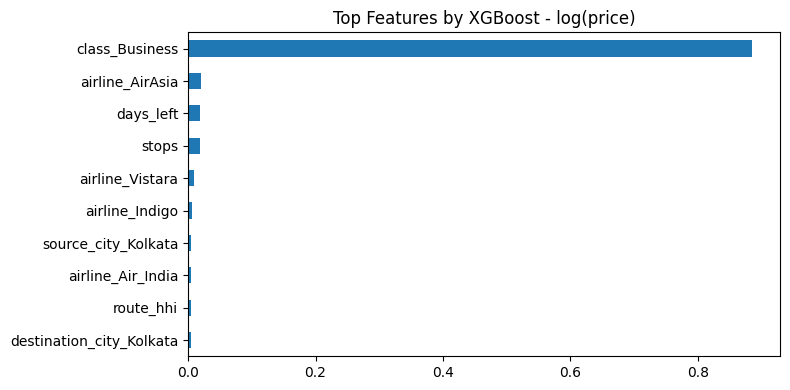

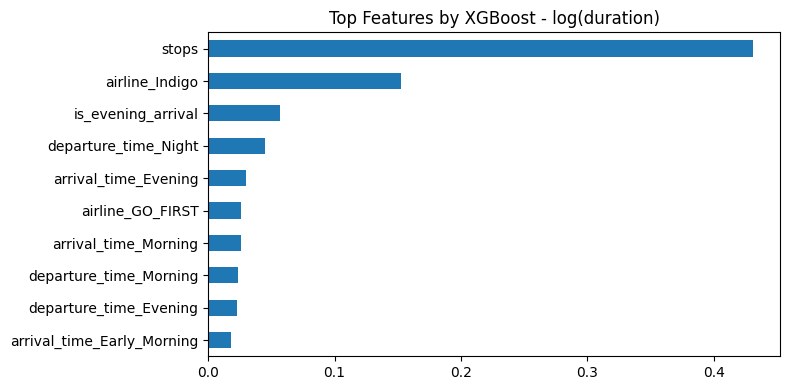

In [100]:
# ======================
# 변수 중요도 (XGBoost)
# ======================
importances_price_xgb = pd.Series(xgb_price.feature_importances_, index=X1.columns).sort_values(ascending=False)
importances_dur_xgb   = pd.Series(xgb_dur.feature_importances_,   index=X1.columns).sort_values(ascending=False)

print("Top Features (log(price)) - XGBoost:")
print(importances_price_xgb.head(10))

print("\nTop Features (log(duration)) - XGBoost:")
print(importances_dur_xgb.head(10))

# ======================
# 변수 중요도 시각화
# ======================
print("\n")
plot_importance(importances_price_xgb, "Top Features by XGBoost - log(price)")
print("\n")
plot_importance(importances_dur_xgb, "Top Features by XGBoost - log(duration)")

In [101]:
# ======================
# OLS 상세 회귀분석
# ======================
X_float = X1_train.astype(float)
X_const = sm.add_constant(X_float)
ols_price = sm.OLS(y1_train["price_log"], X_const).fit()
ols_dur   = sm.OLS(y1_train["duration_log"], X_const).fit()

print("\n=== OLS 결과 (log(price)) ===")
print(ols_price.summary())

print("\n=== OLS 결과 (log(duration)) ===")
print(ols_dur.summary())


=== OLS 결과 (log(price)) ===
                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 9.035e+04
Date:                Sat, 04 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:31:40   Log-Likelihood:                -70883.
No. Observations:              242201   AIC:                         1.418e+05
Df Residuals:                  242171   BIC:                         1.421e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [102]:
# 동시 예측 모델

# 랜덤포레스트
base_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
multi_model_rf = MultiOutputRegressor(base_model)

# 학습
multi_model_rf.fit(X1_train, y1_train)

# 예측
y1_train_multi_rf = multi_model_rf.predict(X1_train)
y1_test_multi_rf = multi_model_rf.predict(X1_test)

In [103]:
# 성능 평가
def evaluate_multi_output(y_train, y_train_pred, y_test, y_test_pred, target_names):
    print("=== MultiOutput Regression Evaluation ===")
    for i, name in enumerate(target_names):
        r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
        rmse_train = np.sqrt(mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i]))
        r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
        rmse_test = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i]))

        print(f"\n[{name}]")
        print(f" R² train: {r2_train:.3f} | RMSE train: {rmse_train:.3f}")
        print(f" exp(RMSE train): {np.exp(rmse_train):.3f}")
        print(f" R² test:  {r2_test:.3f} | RMSE test:  {rmse_test:.3f}")
        print(f" exp(RMSE test): {np.exp(rmse_test):.3f}")


evaluate_multi_output(y1_train, y1_train_multi_rf, y1_test, y1_test_multi_rf, y1_train.columns)

=== MultiOutput Regression Evaluation ===

[price_log]
 R² train: 0.987 | RMSE train: 0.129
 exp(RMSE train): 1.138
 R² test:  0.947 | RMSE test:  0.258
 exp(RMSE test): 1.295

[duration_log]
 R² train: 0.962 | RMSE train: 0.140
 exp(RMSE train): 1.150
 R² test:  0.879 | RMSE test:  0.268
 exp(RMSE test): 1.308


In [104]:
# XGBoost
xgb_base = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1)
multi_model_xgb = MultiOutputRegressor(xgb_base)

# 학습
multi_model_xgb.fit(X1_train, y1_train)

# 예측
y1_train_multi_xgb = multi_model_xgb.predict(X1_train)
y1_test_multi_xgb = multi_model_xgb.predict(X1_test)

# 성능 평가
evaluate_multi_output(y1_train, y1_train_multi_xgb, y1_test, y1_test_multi_xgb, y1_train.columns)

=== MultiOutput Regression Evaluation ===

[price_log]
 R² train: 0.972 | RMSE train: 0.186
 exp(RMSE train): 1.204
 R² test:  0.955 | RMSE test:  0.238
 exp(RMSE test): 1.268

[duration_log]
 R² train: 0.932 | RMSE train: 0.188
 exp(RMSE train): 1.206
 R² test:  0.884 | RMSE test:  0.262
 exp(RMSE test): 1.300


In [105]:
# KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores_multi = cross_val_score(multi_model_xgb, X1_train, y1_train, cv=cv, scoring="r2")
print("Cross-Validation (Multi-Output) R²:", r2_scores_multi)
print(" - 평균 R²:", np.mean(r2_scores_multi))

Cross-Validation (Multi-Output) R²: [0.95185781 0.95096976 0.95093995 0.95106351 0.95196557]
 - 평균 R²: 0.9513593196868897


In [106]:
base_model = XGBRegressor(random_state=42, n_jobs=-1)
multi_model = MultiOutputRegressor(base_model)

# 파라미터 설정
param_grid = {
    "estimator__n_estimators": [100, 200],
    "estimator__learning_rate": [0.05, 0.1],
    "estimator__max_depth": [4, 6],
    "estimator__subsample": [0.7, 1.0],
}

# GridSearchCV 설정
cv = KFold(n_splits=3, shuffle=True, random_state=42)
search = GridSearchCV(multi_model, param_grid, cv=cv, scoring="r2", verbose=1)

# 학습
search.fit(X1_train, y1_train)

# 결과 출력
print("Best Params:", search.best_params_)
print("Best Score:", search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Params: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 6, 'estimator__n_estimators': 200, 'estimator__subsample': 0.7}
Best Score: 0.9516134262084961


In [107]:
# 최적 모델 꺼내기
best_model = search.best_estimator_

# 전체 학습 데이터로 다시 fit
best_model.fit(X1_train, y1_train)

# 예측
y_train_pred = best_model.predict(X1_train)
y_test_pred  = best_model.predict(X1_test)

targets = ["price_log", "duration_log"]

print("=== 최적 XGBoost 모델 평가 ===\n")

for i, target in enumerate(targets):
    print(f"[{target}]")
    r2_train = r2_score(y1_train[target], y_train_pred[:, i])
    r2_test  = r2_score(y1_test[target],  y_test_pred[:, i])
    rmse_train = np.sqrt(mean_squared_error(y1_train[target], y_train_pred[:, i]))
    rmse_test  = np.sqrt(mean_squared_error(y1_test[target],  y_test_pred[:, i]))

    print(f" R² train: {r2_train:.3f} | RMSE train: {rmse_train:.3f}")
    print(f" exp(RMSE train): {np.exp(rmse_train):.3f}")
    print(f" R² test:  {r2_test:.3f} | RMSE test:  {rmse_test:.3f}")
    print(f" exp(RMSE test): {np.exp(rmse_test):.3f}")

=== 최적 XGBoost 모델 평가 ===

[price_log]
 R² train: 0.973 | RMSE train: 0.184
 exp(RMSE train): 1.203
 R² test:  0.955 | RMSE test:  0.237
 exp(RMSE test): 1.268
[duration_log]
 R² train: 0.935 | RMSE train: 0.184
 exp(RMSE train): 1.202
 R² test:  0.886 | RMSE test:  0.260
 exp(RMSE test): 1.296


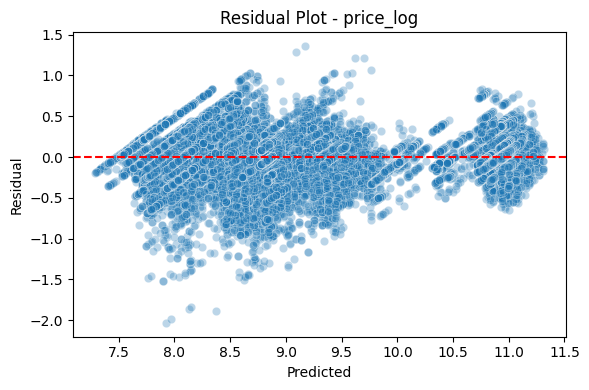

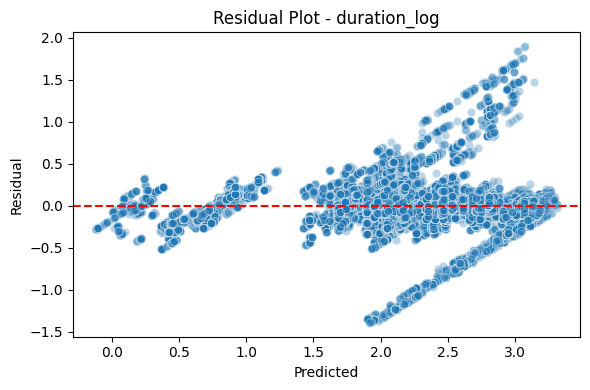

In [108]:
# 잔차 시각화
residuals = y_test_pred - y1_test.values
targets = ["price_log", "duration_log"]

for i, target in enumerate(targets):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test_pred[:, i], y=residuals[:, i], alpha=0.3)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.title(f"Residual Plot - {target}")
    plt.tight_layout()
    plt.show()

In [109]:
def recommend_airline(user_input, model, top_k=3, time_weight=0.5):
    # 추천 후보 만들기
    candidates = []
    for airline in df['airline'].unique():
        row = user_input.copy()
        row["airline"] = airline

        # 자동 파생 변수 계산
        row["is_redeye_from_dep"] = int(row["departure_time"] in ["Night", "Early_Morning"])
        row["is_evening_arrival"] = int(row["arrival_time"] in ["Evening", "Night"])

        route = row["source_city"] + "-" + row["destination_city"]

        # HHI 계산
        hhi_row = route_hhi[route_hhi["route"] == route]
        row["route_hhi"] = float(hhi_row["route_hhi"].values[0]) if not hhi_row.empty else 0.5  # 기본값 0.5

        candidates.append(row)

    # 데이터프레임으로 만들고 인코딩
    df_cand = pd.DataFrame(candidates)
    df_cand_encoded = pd.get_dummies(df_cand)

    # 모델에 들어갈 컬럼 정렬 및 누락 컬럼 처리
    for col in X1_train.columns:
        if col not in df_cand_encoded.columns:
            df_cand_encoded[col] = 0
    df_cand_encoded = df_cand_encoded[X1_train.columns]

    # 예측
    preds = model.predict(df_cand_encoded)
    df_cand["pred_price_log"] = preds[:, 0]
    df_cand["pred_price"] = np.exp(preds[:, 0])
    df_cand["pred_duration_log"] = preds[:, 1]
    df_cand["pred_duration"] = np.exp(preds[:, 1])

    # 정규화
    price_norm = (df_cand["pred_price"] - df_cand["pred_price"].min()) / (df_cand["pred_price"].max() - df_cand["pred_price"].min())
    dur_norm = (df_cand["pred_duration"] - df_cand["pred_duration"].min()) / (df_cand["pred_duration"].max() - df_cand["pred_duration"].min())

    # 점수 계산
    df_cand["score"] = time_weight * dur_norm + (1 - time_weight) * price_norm

    # 결과 정렬 및 반환
    df_result = df_cand.sort_values("score", ascending=False).reset_index(drop=True).head(top_k)
    return df_result[["airline", "pred_price", "pred_duration", "score"]]

In [110]:
user_input = {
    "source_city": "Delhi",
    "destination_city": "Mumbai",
    "class": "Economy",
    "days_left": 10,
    "stops": 0,
    "departure_time": "Morning",
    "arrival_time": "Evening"
}

result = recommend_airline(user_input, best_model, time_weight=0.7)
print(result)
print()

print("===== 최적 항공사 =====")
best_airline = result['airline'].iloc[0]
print(best_airline)

    airline   pred_price  pred_duration     score
0    Indigo  7567.194824       2.381823  0.883218
1  GO_FIRST  7853.755859       2.216613  0.719951
2   AirAsia  7251.203125       2.255773  0.540774

===== 최적 항공사 =====
Indigo
